In [178]:
import imutils
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from collections import deque
import os
import random
import csv

In [179]:
def bfs(coordinates, visited, start, num):
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    queue = deque([start])
    area = 0

    while queue:
        current = queue.popleft()
        x, y = current

        if visited[x][y] == 0:
            visited[x][y] = num
            area += 1

            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if (nx, ny) in coordinates and visited[nx][ny] == 0:
                    queue.append((nx, ny))

    return area


def count_black_areas(coordinates):
    if not coordinates:
        return []

    min_x, min_y = min(x for x, y in coordinates), min(
        y for x, y in coordinates)
    max_x, max_y = max(x for x, y in coordinates), max(
        y for x, y in coordinates)

    rows, cols = max_x - min_x + 1, max_y - min_y + 1
    visited = [[0] * cols for _ in range(rows)]
    mapped_coordinates = [(x - min_x, y - min_y) for x, y in coordinates]

    num = 1
    areas = []
    area_mapping = {}

    for i in range(rows):
        for j in range(cols):
            if (i, j) in mapped_coordinates and visited[i][j] == 0:
                area = bfs(mapped_coordinates, visited, (i, j), num)
                areas.append(area)
                current_area_coordinates = [
                    (x + min_x, y + min_y) for x, y in mapped_coordinates if visited[x][y] == num]
                area_mapping[num] = current_area_coordinates
                num += 1

    return areas, area_mapping


def extract_all_non_white_points(image_path, num_points=90, test=False, radius=1):
    with Image.open(image_path) as img:
        img = ImageOps.flip(img)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = np.array(img)

        img = imutils.resize(img, width=500)
        pixels = np.array(img)

    white_threshold = 245
    non_white_pixels = np.where(np.any(pixels < white_threshold, axis=-1))
    non_white_point_coordinates = list(zip(non_white_pixels[1], non_white_pixels[0]))

    """
    points = []
    for x, y in non_white_point_coordinates:
        neighborhood = pixels[y - radius:y + radius + 1, x - radius:x + radius + 1]
        if np.any(neighborhood >= white_threshold):
            points.append((x, y))

    if test:
        plt.scatter(*zip(*points), label='non_white_points')
        plt.title('ori_kaomoji')
        plt.show()

    if len(points) < num_points:
        raise ValueError("Not enough non-white points to sample the desired number of points.")
    sampled_points = random.sample(points, num_points)
    """
    
    
    #bfs找出每個色塊的面積然後按比例random sample
    areas, area_mapping = count_black_areas(non_white_point_coordinates)
    sampled_points = []
    total_area = sum(areas)
    ratio = [int(num_points * area / total_area) for area in areas] 
    diff = num_points - sum(ratio)
    max_ratio_index = ratio.index(max(ratio))
    ratio[max_ratio_index] += diff

    for area, selection in zip(area_mapping, ratio):
        if area in area_mapping:
            sampled_points.extend(random.sample(area_mapping[area], selection))
    
    sampled_points = random.sample( non_white_point_coordinates, num_points)
    return sampled_points

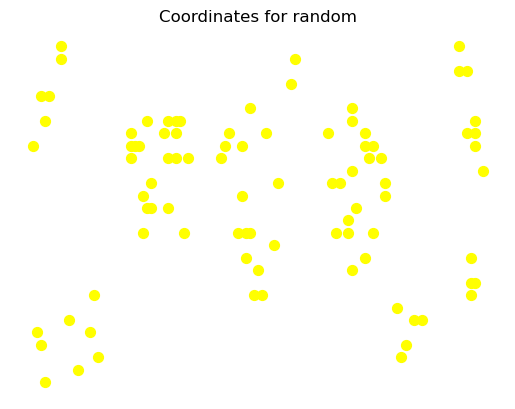

'\nimage_files = [f for f in os.listdir(folder_path) if f.endswith((\'.jpg\', \'.png\'))]\nwith open(csv_file_path, mode=\'w\', newline=\'\') as file:\n    writer = csv.writer(file)\n    # 寫入標頭\n    header = [\'File Name\'] + [f\'Point {i}\' for i in range(1, 69)]\n    writer.writerow(header)\n    \n    # 迭代每一個檔案，提取點，並寫入CSV\n    random.seed(42)\n    for image_file in image_files:\n        image_path = os.path.join(folder_path, image_file)\n        points = extract_all_non_white_points(image_path)\n        #print(points)\n        # 將每個點的(x,y)座標轉換成"(x,y)"格式的字符串\n        points_str = [f"({x},{y})" for x, y in points]\n        # 寫入檔名和所有點的座標\n        writer.writerow([image_file] + points_str)\n'

In [180]:
image_path = 'images/3.jpg'
csv_file_path = 'points.csv'
points = extract_all_non_white_points(image_path)
x_coords, y_coords = zip(*points)
# 步驟4：設定畫布並繪製點
#plt.figure(figsize=(8, 8))
plt.scatter(x_coords, y_coords, c='yellow', s=50)  # s是點的大小

# 步驟5：設置圖形標題和標籤
plt.title(f'Coordinates for random')
plt.axis('off') 
plt.show()
'''
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))]
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # 寫入標頭
    header = ['File Name'] + [f'Point {i}' for i in range(1, 69)]
    writer.writerow(header)
    
    # 迭代每一個檔案，提取點，並寫入CSV
    random.seed(42)
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        points = extract_all_non_white_points(image_path)
        #print(points)
        # 將每個點的(x,y)座標轉換成"(x,y)"格式的字符串
        points_str = [f"({x},{y})" for x, y in points]
        # 寫入檔名和所有點的座標
        writer.writerow([image_file] + points_str)
'''